### About Dataset

* 1886 observations by Galton on 934 children and their 205 families.

* The main goal of this study was to establish a relationship between children and parents' heights. Galton also wanted to find out whether marriage selection indicates a relationship between a husband's and his wife's heights

Feature Descriptions: 
* rownames: Index or row identifier for each entry.
* family: Family identifier or label.
* father: Numeric data representing the height of the father.
* mother: Numeric data representing the height of the mother.
* midparentHeight: Mid-parent height calculated as  (father + 1.08*mother)/2
* children: Number of children in the family.
* childNum: Number of the child within the family, listed by height order (boys first, then girls).
* gender: Gender of the child (text format).
* childHeight: Height of the child.

https://www.kaggle.com/datasets/jacopoferretti/parents-heights-vs-children-heights-galton-data

### Objective

To analyze height data from families, including parents and children, to understand how parental heights relate to the heights of their offspring

### Snapshot

![Snapshot](picII.png)

### Library

In [9]:
import pandas as pd             
import numpy as np             
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns       

In [10]:
df= pd.read_csv('GaltonFamilies.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownames         934 non-null    int64  
 1   family           934 non-null    object 
 2   father           934 non-null    float64
 3   mother           934 non-null    float64
 4   midparentHeight  934 non-null    float64
 5   children         934 non-null    int64  
 6   childNum         934 non-null    int64  
 7   gender           934 non-null    object 
 8   childHeight      934 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 65.8+ KB


In [12]:
df.shape

(934, 9)

In [13]:
df.describe()

,rownames,father,mother,midparentHeight,children,childNum,childHeight
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,467.500000,69.197109,64.089293,69.206773,6.171306,3.585653,66.745931
std,269.766875,2.476479,2.290886,1.802370,2.729025,2.361410,3.579251
min,1.000000,62.000000,58.000000,64.400000,1.000000,1.000000,56.000000
25%,234.250000,68.000000,63.000000,68.140000,4.000000,2.000000,64.000000
50%,467.500000,69.000000,64.000000,69.248000,6.000000,3.000000,66.500000
75%,700.750000,71.000000,65.875000,70.140000,8.000000,5.000000,69.700000
max,934.000000,78.500000,70.500000,75.430000,15.000000,15.000000,79.000000


In [14]:
df.columns 

Index(['rownames', 'family', 'father', 'mother', 'midparentHeight', 'children',
       'childNum', 'gender', 'childHeight'],
      dtype='object')

In [15]:
print(df.isnull().sum())

rownames           0
family             0
father             0
mother             0
midparentHeight    0
children           0
childNum           0
gender             0
childHeight        0
dtype: int64


## EDA CYCLE

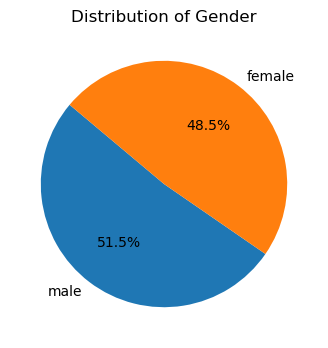

In [17]:
gender_c = df['gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_c, labels=gender_c.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.show()

### Interpretation


From the above pie chart we can visualize the distribution of genders in dataset with males constitute 51.5% while females make up 48.5%, indicating a slight majority of males.

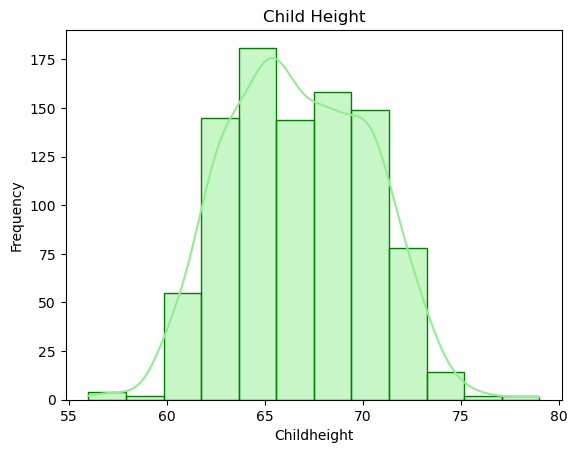

In [20]:
sns.histplot(df['childHeight'], bins = 12, color = 'lightgreen', kde = True, edgecolor = 'green')

# Add labels
plt.title('Child Height')
plt.xlabel('Childheight')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Interpretation

* The above histogram is slightly right skewed.
* Highest occurance of child height is around 65.

In [23]:
# Checking the data type as scatterplot excepts either integer and float
print(df['midparentHeight'].dtype)
print(df['childHeight'].dtype)


float64
float64


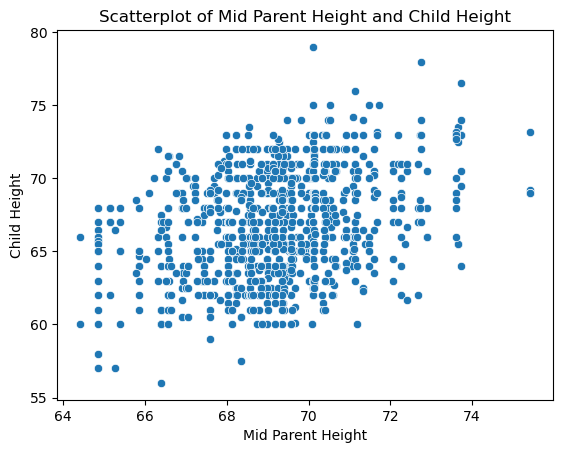

In [24]:
sns.scatterplot(x=df['midparentHeight'], y=df['childHeight'])  
plt.title('Scatterplot of Mid Parent Height and Child Height')    
plt.xlabel('Mid Parent Height')                                
plt.ylabel('Child Height')                          
plt.show()

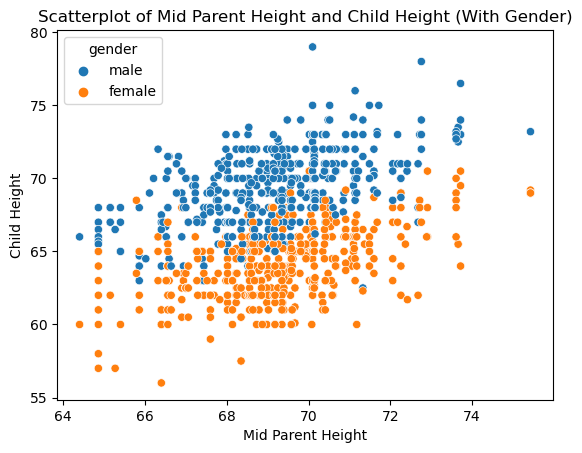

In [25]:
sns.scatterplot(x=df['midparentHeight'], y=df['childHeight'], hue=df['gender'])  
plt.title('Scatterplot of Mid Parent Height and Child Height (With Gender)')    
plt.xlabel('Mid Parent Height')                                
plt.ylabel('Child Height')                          
plt.show()

### Interpretation

The Scatterplot shows a noticeable positive correlation between parent height and child height. As parent height increases, there tends to be an increase in child height.

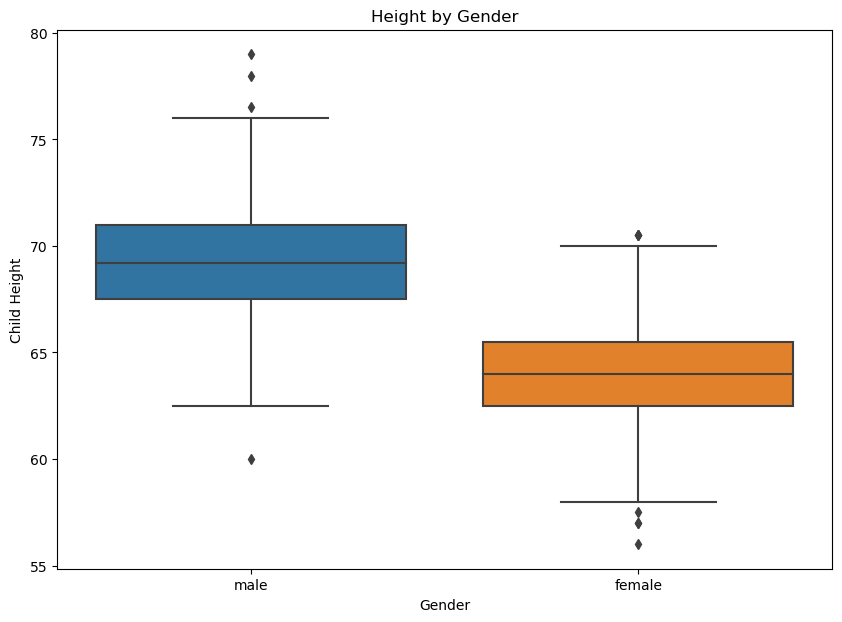

In [28]:
plt.figure(figsize=(10,7))  # Adjust the figure width
sns.boxplot(x=df['gender'], y=df['childHeight'])

plt.xlabel ('Gender')
plt.ylabel('Child Height')
plt.title('Height by Gender')
plt.show()

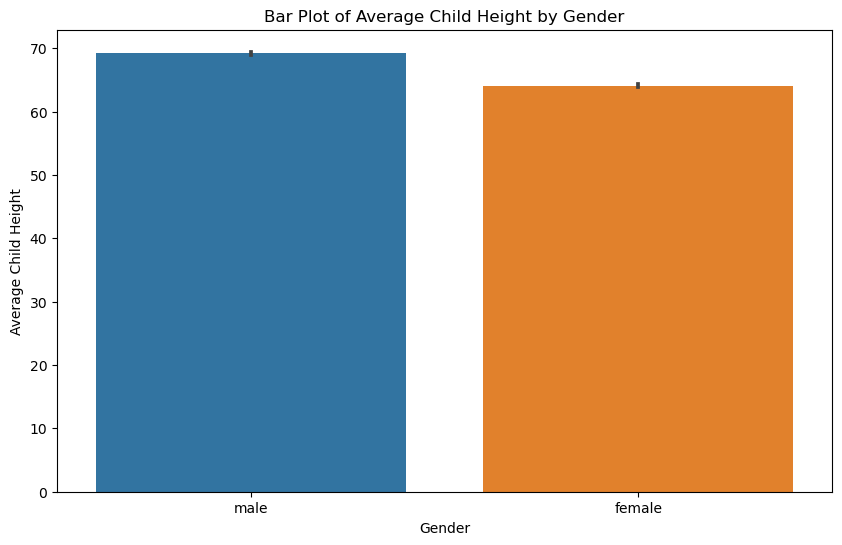

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='gender', y='childHeight')
plt.title('Bar Plot of Average Child Height by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Child Height')
plt.show()

### Interpretation

* Across the scatter plot, box plot, and bar graph above, a trend is observed where male children tend to show slightly higher average heights.
* This data suggests that the average height for males at that time was around 69 inches, whereas for females it was around 64 inches.

/var/folders/xg/jzvt2kb51wxbb31l61yj09k00000gn/T/ipykernel_93980/3289918664.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


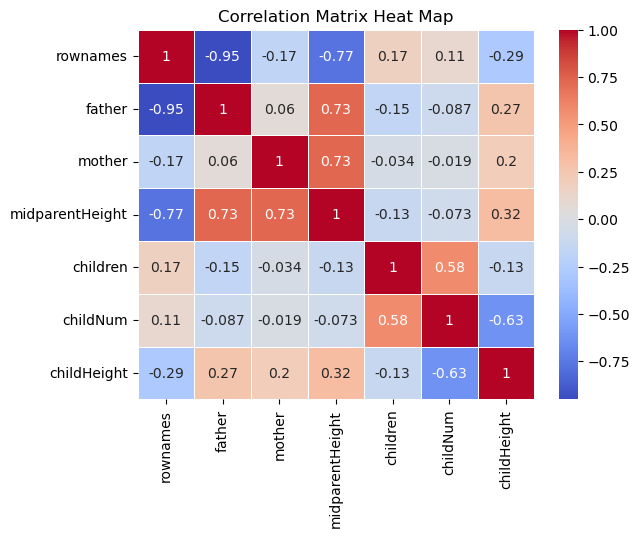

In [32]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heat Map')
plt.show()

### Interpretation

* The heatmap demonstrates a clear trend where taller parents generally correspond to taller children. This relationship holds consistently across various demographic groups and genders, underscoring its robust nature.

* The correlation coefficient of 0.32 between midparent height and child height indicates a moderate positive relationship. This suggests that as midparent height increases, there is a tendency for child height to also increase, albeit moderately. This finding implies that taller parents tend to have taller children, highlighting the influence of parental height on offspring stature. While this correlation underscores a significant trend, it's important to consider that other factors, such as genetic variations and environmental influences, also contribute to the variability in child height.

## Conclusion

From this analysis of Galton's dataset:

* We can observe a moderate positive correlation (correlation coefficient of 0.32) between midparent height and child height, indicating that taller midparent heights tend to correlate with taller child heights.
* This relationship is consistent across different genders, with both male and female children showing similar trends in height correlation with parental height.
* Visualizations such as scatter plots and heatmaps confirm that taller parents generally have taller children, providing robust evidence of this trend.
* Galton's dataset underscores the significance of parental genetics in determining offspring height, a finding that has enduring implications in genetics and family health studies.
* Further exploration into factors beyond genetics, such as environmental influences and nutrition, could provide deeper insights into variations in child height.